This is an example of what you might do when you first look at some root files that you've never seen before. In this exercise, we will imagine that we're just getting started on some sort of dijet resonance analysis. Luckily, your signal, backgrounds, and data have all been ntuplized already, and the output ntuples are located on eos at: 

`/eos/uscms/store/user/hats/PyRoot/2017/qcd_samples`

In Jupyter, we can execute shell commands by prepending the usual commands with `!`

In [1]:
!ls -lrth /eos/uscms/store/user/hats/PyRoot/2017/qcd_samples

total 9.5K
-rw-r--r-- 2 hats us_cms   29 Mar 28 15:59 jhak.test
-rw-r--r-- 2 hats us_cms 1.7K Mar 28 16:50 recursiveFileList.py
-rw-r--r-- 2 hats us_cms 2.4K Mar 28 16:51 recursiveFileList.pyc
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:01 QCD_HT1000to1500_0_0
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:03 QCD_HT500to700_2_3
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:04 QCD_HT1500to2000_0_0
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:05 QCD_HT300to500_1_2
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:06 QCD_HT300to500_2_0
-rw-r--r-- 2 hats us_cms 1.1K Mar 28 17:07 xrdcpRecursive.py
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:07 QCD_HT200to300_2_2
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:08 QCD_HT300to500_2_3
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:09 QCD_HT200to300_1_0
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:10 QCD_HT300to500_2_1
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:11 QCD_HT300to500_0_3
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:13 QCD_HT200to300_1_2
drwxr-xr-x 1 hats us_cms    0 Mar 28 17:13 QCD_HT200to300_3_

Let's see our signal samples, which are in `shuffled_sig`:

In [2]:
!ls -lrth /eos/uscms/store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig

total 885M
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_0.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_10.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_11.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_12.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_13.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_14.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_15.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_16.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_17.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_18.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_19.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_1.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_2.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_3.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shuffled_4.root
-rw-r--r-- 2 hats us_cms 23M Apr 12 13:48 sig_shu

Let's use pyROOT to take a look at the basic structure of the file and the branches therein.

> Note:
>   One could do all of this in an interactive python session, using 
>
>   `python -i`
>
>  Interactive pyROOT is very useful for quickly looking at ROOT files and other tasks, such as formatting ROOT graphics. If you are interested in this, please ask the instructor for a demonstration of where this can come in handy (e.g. reformatting plots in interactive pyROOT while a TCanvas is open).

Commonly, pyROOT scripts start out with

`from ROOT import *`

but this is not allowed in JupyROOT. However, we can still save some typing by referring to ROOT with a shorter name:

In [3]:
import ROOT as r

Welcome to JupyROOT 6.08/05


In [4]:
firstLookFile = r.TFile("/eos/uscms/store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root")

In [5]:
firstLookFile.ls()

TFile**		/eos/uscms/store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root	
 TFile*		/eos/uscms/store/user/hats/PyRoot/2017/qcd_samples/shuffled_sig/sig_shuffled_0.root	
  KEY: TTree	tree;1	tree


In [6]:
firstLookTree = firstLookFile.Get("tree")

Already, we're benefitting from pyROOT's syntax. Note that a similar step in an interactive ROOT session would require a bit more effort:

`TTree* firstLookTree = (TTree*) firstLookFile->Get("tree")`

Let's use a quick python loop to list all the branches in our tree.

In [7]:
for branch in firstLookTree.GetListOfBranches():
    print branch.GetName()

ph_N
ph_pdgId
ph_charge
ph_e
ph_eta
ph_phi
ph_mass
ph_pt
ph_et
ph_rho
ph_superCluster_eta
ph_superCluster_phi
ph_sigmaIetaIeta
ph_hOverE
ph_isoGamma
ph_isoCh
ph_passEleVeto
ph_passLooseId
ph_passMediumId
ph_passTightId
ph_mvaVal
ph_mvaCat
rho
jetAK4_N
jetAK4_pt
jetAK4_eta
jetAK4_mass
jetAK4_phi
jetAK4_e
jetAK4_jec
jetAK4_jecUp
jetAK4_jecDown
jetAK4_IDLoose
jetAK4_IDTight
jetAK4_IDTightLepVeto
jetAK4_charge
jetAK4_csv
jetAK4_vtxMass
jetAK4_vtxNtracks
jetAK4_vtx3DVal
jetAK4_vtx3DSig
jetAK4_partonFlavour
jetAK4_hadronFlavour
jetAK4_genParton_pdgID
jetAK4_nbHadrons
jetAK4_ncHadrons
jetAK4_jer_sf
jetAK4_jer_sf_up
jetAK4_jer_sf_down
jetAK4_jer_sigma_pt
jetAK8_N
jetAK8_pt
jetAK8_eta
jetAK8_mass
jetAK8_phi
jetAK8_e
jetAK8_jec
jetAK8_jecUp
jetAK8_jecDown
jetAK8_IDLoose
jetAK8_IDTight
jetAK8_IDTightLepVeto
jetAK8_charge
jetAK8_partonFlavour
jetAK8_hadronFlavour
jetAK8_genParton_pdgID
jetAK8_nbHadrons
jetAK8_ncHadrons
jetAK8_jer_sf
jetAK8_jer_sf_up
jetAK8_jer_sf_down
jetAK8_jer_sigma_pt
jetAK8Pup

Our analysis is going to look for dijet resonances using AK4 jets. So to get a feel for the data, let's look at what the AK4 jet pT spectrum looks like.

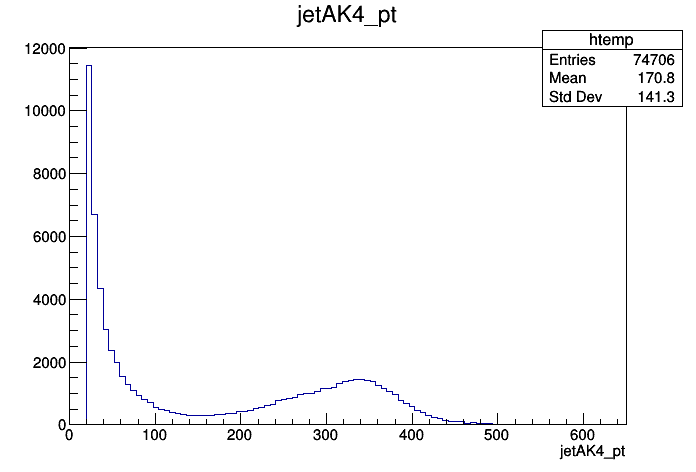

In [8]:
can = r.TCanvas()      
firstLookTree.Draw("jetAK4_pt")
can.Draw()

> Note that in interactive pyROOT, one can simply call `firstLookTree.Draw("jetAK4_pt")` without bothering to explicitly instantiate a TCanvas and call TCanvas.Draw() on it

Let's do some quick changes to the plot. `r.gStyle` gives us access to common style changes for ROOT graphics.

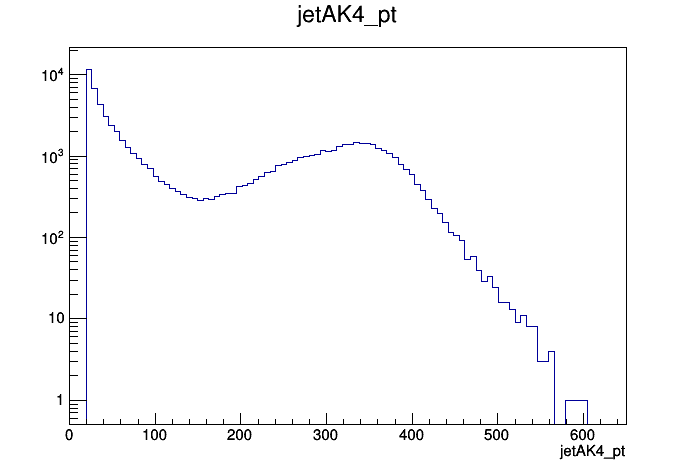

In [9]:
r.gStyle.SetOptStat(0)
can.SetLogy()
can.Draw()

Let's quickly demonstrate python's introspection features. ROOT automatically builds a lot of things into a TCanvas that might not be obvious when you simply call `TTree.Draw('branchName')`, so let's see what's in our canvas and what methods we could call on it. And let's make the output more readable while we're at it. 

In [20]:
import inspect
from pprint import pprint
for primitive in can.GetListOfPrimitives():
    print primitive, pprint(inspect.getmembers(primitive, predicate=inspect.ismethod))

<ROOT.TFrame object ("TFrame") at 0x5306570>[('AbstractMethod', <ROOT.MethodProxy object at 0x7ff87c355810>),
 ('AppendPad', <ROOT.MethodProxy object at 0x7ff87c355650>),
 ('Browse', <ROOT.MethodProxy object at 0x7ff87c355710>),
 ('Class', <ROOT.MethodProxy object at 0x7ff87c3556d0>),
 ('ClassName', <ROOT.MethodProxy object at 0x7ff87c355110>),
 ('Class_Name', <ROOT.MethodProxy object at 0x7ff87c355910>),
 ('Class_Version', <ROOT.MethodProxy object at 0x7ff87c355990>),
 ('Clear', <ROOT.MethodProxy object at 0x7ff87c355950>),
 ('Clone', <ROOT.MethodProxy object at 0x7ff87c3559d0>),
 ('Compare', <ROOT.MethodProxy object at 0x7ff87c355a50>),
 ('Copy', <ROOT.MethodProxy object at 0x7ff87c355a90>),
 ('DeclFileLine', <ROOT.MethodProxy object at 0x7ff87c355ad0>),
 ('DeclFileName', <ROOT.MethodProxy object at 0x7ff87c355b10>),
 ('Delete', <ROOT.MethodProxy object at 0x7ff87c355b50>),
 ('Dictionary', <ROOT.MethodProxy object at 0x7ff87c355b90>),
 ('DistancetoLine', <ROOT.MethodProxy object at 0

Now that we know what's in our trees and gotten a quick look to sanity-check the data, we'll get started trying to tackle the many gigs of data that are at hand. pyROOT is not the right tool for crunching this much data, so let's move on to preparing a C++ class to do the number crunching.

In [21]:
firstLookTree.MakeClass("hatsTrees")

0

Info in <TTreePlayer::MakeClass>: Files: hatsTrees.h and hatsTrees.C generated from TTree: tree


Let's see what this made for us:

In [22]:
!ls -lrth

total 140K
-rw-r--r-- 1 jhakala us_cms  90K Apr 12 18:47 Untitled.ipynb
-rw-r--r-- 1 jhakala us_cms  42K Apr 12 18:48 hatsTrees.h
-rw-r--r-- 1 jhakala us_cms 1.5K Apr 12 18:48 hatsTrees.C


Our aim is to use this C++ class to do the CPU-intensive work of our analysis, but to keep it as a "plugin" inside our pyroot framework.

In [ ]:
Please move on to the notebook `hatsTrees.ipynb`